In [60]:
import sys
sys.path.append("../src/")
sys.path.append("..")

You want to look just at performance on concrete words with high polysemy, I think. 

frequencies used here
There is a lemmatised frequency list for the 6,318 words with more than 800 occurrences in the whole 100M-word BNC. The definition of a 'word' approximates to a headword in an EFL dictionary such as Longman's Dictionary of Contemporary English: so, eg, nominal and verbal "help" are listed separately, and the count for verbal "help" is the sum of counts for verbal 'help', 'helps', 'helping', 'helped'.

In [61]:
bnc_freq_filename = '/Users/gabriellachronis/data/bnc_freq/lemma.al.txt'

import pandas as pd

bnc_df = pd.read_csv(bnc_freq_filename, sep = " ", encoding = "iso8859_15", names = ['sort-order', 'frequency', 'word', 'word-class'])

In [62]:
bnc_df

,sort-order,frequency,word,word-class
0,5,2186369,a,det
1,2107,4249,abandon,v
2,5204,1110,abbey,n
3,966,10468,ability,n
4,321,30454,able,a
...,...,...,...,...
6313,72,138334,your,det
6314,2111,4239,yours,pron
6315,939,10746,yourself,pron
6316,1671,5686,youth,n


In [63]:
# noun frequencies are per million words

bnc_nounfreq_df = bnc_df[bnc_df['word-class'] == 'n']

bnc_nounfreq_df.sort_values(by = "frequency", ascending = False).head(25)

,sort-order,frequency,word,word-class
5729,53,183427,time,n
6301,60,163930,year,n
4017,80,125430,people,n
6134,89,112636,way,n
3352,101,97985,man,n
1416,104,92699,day,n
5689,115,77612,thing,n
888,121,71008,child,n
2482,133,66894,government,n
3956,135,65773,part,n


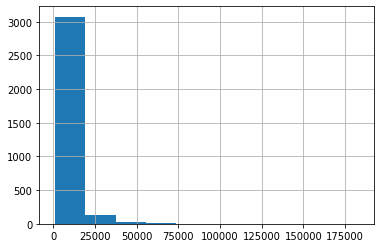

In [64]:
%matplotlib inline

# distribution of frequency ratings
bnc_nounfreq_df.frequency.hist();

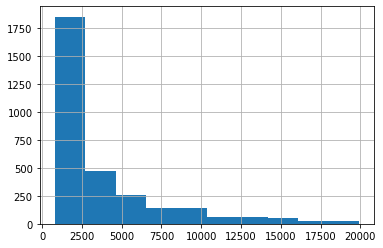

In [65]:
# closer look at the lower frequencies
bnc_nounfreq_df[bnc_nounfreq_df.frequency < 20000].frequency.hist();

In [66]:
len(bnc_nounfreq_df)

3262

In [67]:
# retain only the reasonably frequent nouns
bnc_nounfreq_df = bnc_nounfreq_df[bnc_nounfreq_df.frequency > 25]

In [68]:
# and retain only the columns we need
bnc_nounfreq_df = bnc_nounfreq_df[["word", "frequency"]]

In [69]:
bnc_nounfreq_df = bnc_nounfreq_df.set_index("word")

In [70]:
brysbaert_filename = "/Users/gabriellachronis/data/Concreteness_ratings_Brysbaert_et_al_BRM.csv"

concreteness_df = pd.read_csv(brysbaert_filename, sep='\t')

In [71]:
concreteness_df.head()

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
0,roadsweeper,0,4.85,0.37,1,27,0.96,0,0
1,traindriver,0,4.54,0.71,3,29,0.90,0,0
2,tush,0,4.45,1.01,3,25,0.88,66,0
3,hairdress,0,3.93,1.28,0,29,1.00,1,0
4,pharmaceutics,0,3.77,1.41,4,26,0.85,0,0


In [72]:
concreteness_df= concreteness_df[["Word", "Conc.M"]]

In [73]:
concreteness_df = concreteness_df.set_index("Word")

In [74]:
# join concreteness ratings with BNC frequencies
# inner join = form intersection, keeping only words
# that are present in both
noun_stats_df = bnc_nounfreq_df.join(concreteness_df, how = "inner")

In [75]:
noun_stats_df.sort_values(by="Conc.M", ascending=False).head(50)

,frequency,Conc.M
apple,2996,5.0
carrot,861,5.0
bat,1249,5.0
basket,1658,5.0
elbow,1626,5.0
elephant,1457,5.0
banana,924,5.0
cage,1100,5.0
ladder,1558,5.0
doll,989,5.0


## Step 3: add number of WordNet senses

In [76]:
import nltk
from nltk.corpus import wordnet

noun_stats_df["WN_numsenses"] = [len(wordnet.synsets(word, pos = nltk.corpus.wordnet.NOUN))
                      for word in noun_stats_df.index]

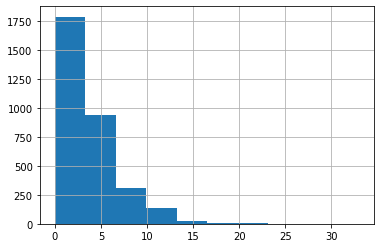

In [77]:
# distribution of number of WordNet senses
noun_stats_df.WN_numsenses.hist();

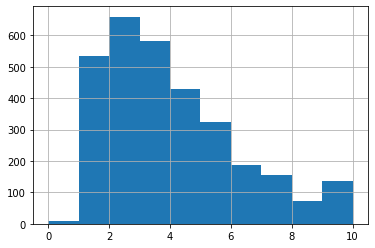

In [78]:
# low numbers in more detail
noun_stats_df[noun_stats_df.WN_numsenses <=10].WN_numsenses.hist();

## Step 4: put all words into WordNet polysemy bins and concreteness bins

We use binning on WordNet polysemy as well as on concreteness, so that we can easily sample nouns from each bin.

In [79]:
# WordNet bins: 1 sense, 2 senses, 3 senses , 4-5 senses, 6 and more senses
noun_stats_df["WNbin"] = pd.cut(noun_stats_df.WN_numsenses, 
                                bins = [0, 1.5, 2.5, 3.5, 5.1, 200], labels = False)

In [80]:
# statistics on the bins
noun_stats_df.groupby("WNbin").size()

WNbin
0.0    533
1.0    659
2.0    583
3.0    752
4.0    664
dtype: int64

In [81]:
# concreteness bins: 0-2.3, 2.3-4.5, 4.5 and higher
noun_stats_df["Concretenessbin"] = pd.cut(noun_stats_df["Conc.M"], 
                                          bins = [0, 1.5, 2.5, 3.5, 4.5, 10], labels = False)

In [82]:
# statistics on the bins
noun_stats_df.groupby("Concretenessbin").size()

Concretenessbin
0     26
1    621
2    869
3    895
4    789
dtype: int64

In [83]:
# do we have enough entries in each cell
# that is, for each combination of concreteness and polysemy?
# yes, looks good.
for wnbin in noun_stats_df.WNbin.unique():
    for concretebin in noun_stats_df.Concretenessbin.unique():
        print("Polysemy bin", wnbin, "concreteness bin", concretebin,
              "size", 
              noun_stats_df[(noun_stats_df.WNbin == wnbin) & 
                            (noun_stats_df.Concretenessbin == concretebin)].shape[0])

Polysemy bin 1.0 concreteness bin 1 size 150
Polysemy bin 1.0 concreteness bin 2 size 181
Polysemy bin 1.0 concreteness bin 3 size 170
Polysemy bin 1.0 concreteness bin 4 size 147
Polysemy bin 1.0 concreteness bin 0 size 11
Polysemy bin 0.0 concreteness bin 1 size 84
Polysemy bin 0.0 concreteness bin 2 size 116
Polysemy bin 0.0 concreteness bin 3 size 175
Polysemy bin 0.0 concreteness bin 4 size 155
Polysemy bin 0.0 concreteness bin 0 size 3
Polysemy bin 3.0 concreteness bin 1 size 164
Polysemy bin 3.0 concreteness bin 2 size 204
Polysemy bin 3.0 concreteness bin 3 size 178
Polysemy bin 3.0 concreteness bin 4 size 200
Polysemy bin 3.0 concreteness bin 0 size 6
Polysemy bin 4.0 concreteness bin 1 size 82
Polysemy bin 4.0 concreteness bin 2 size 193
Polysemy bin 4.0 concreteness bin 3 size 229
Polysemy bin 4.0 concreteness bin 4 size 159
Polysemy bin 4.0 concreteness bin 0 size 1
Polysemy bin 2.0 concreteness bin 1 size 137
Polysemy bin 2.0 concreteness bin 2 size 170
Polysemy bin 2.0 co

In [84]:
limited_noun_stats_df = noun_stats_df[(noun_stats_df["Concretenessbin"] >= 4)
                                      & (noun_stats_df['frequency' ] > 2000)
                                        & (noun_stats_df['WNbin'] >= 3) ]

limited_noun_stats_df

,frequency,Conc.M,WN_numsenses,WNbin,Concretenessbin
arm,20089,4.96,6,4.0,4
baby,11503,5.00,7,4.0,4
bag,6955,4.90,9,4.0,4
ball,8636,5.00,12,4.0,4
band,9003,4.68,13,4.0,4
...,...,...,...,...,...
wing,5142,4.86,11,4.0,4
wire,2672,4.72,4,3.0,4
wood,6817,4.85,8,4.0,4
worker,18247,4.59,4,3.0,4


In [85]:
## sample across polysemy bins

# sampling
# sampled_dfs = [ ]

# # make one sampled data frame for each cell
# for wnbin in [0.0, 1.0, 2.0, 3.0]:
#     cell= limited_noun_stats_df[noun_stats_df.WNbin == wnbin]        
#     sampled_dfs.append( cell.sample(n=5, replace = False,random_state = 12) )
        
# # and concatenate all the sampled dfs
# sampled_nouns_df = pd.concat(sampled_dfs)

# sampled_nouns_df

In [86]:
# concrete nouns we sampled across different polysemy bins

sampled_nouns = ['clock',
 'clothes',
 'passenger',
 'movie',
 'cattle',
 'diary',
 'bathroom',
 'telephone',
 'cathedral',
 'brick',
 'birth',
 'tin',
 'injury',
 'neck',
 'sex',
 'drawing',
 'bay',
 'surface',
 'call',
 'boot']

In [87]:
# sample from the current limited df which is just 2 highest polysemy bins and super concrete

sampled_nouns_df = limited_noun_stats_df.sample(n=20, replace = False,random_state = 12)


In [88]:
# concrete words we have sampled from the BNC at  high bands

list(sampled_nouns_df.index)

['neck',
 'seed',
 'town',
 'patch',
 'yard',
 'pound',
 'plane',
 'hair',
 'timber',
 'salt',
 'letter',
 'string',
 'bell',
 'bath',
 'pen',
 'wing',
 'step',
 'hall',
 'bar',
 'cotton']

In [89]:
# also the words from the test set

test_words = """coconut
crayon
calf
yacht
potato
pier
blackbird
spear
microscope
cow
projector
drill
nylons
bus
shelves
cake
crowbar
bullet
lamb
stereo
stool
rocket
belt
violin
walnut
clock
alligator
tongs
taxi
bucket
ambulance
swimsuit
pants
camisole
mat
bread
door
bull
knife
coyote
cod
grapefruit
lobster
strainer
helicopter
cauliflower
tank
house
chisel
blueberry
bison
robe
cupboard
card"""

test_words = test_words.split("\n")
test_words

['coconut',
 'crayon',
 'calf',
 'yacht',
 'potato',
 'pier',
 'blackbird',
 'spear',
 'microscope',
 'cow',
 'projector',
 'drill',
 'nylons',
 'bus',
 'shelves',
 'cake',
 'crowbar',
 'bullet',
 'lamb',
 'stereo',
 'stool',
 'rocket',
 'belt',
 'violin',
 'walnut',
 'clock',
 'alligator',
 'tongs',
 'taxi',
 'bucket',
 'ambulance',
 'swimsuit',
 'pants',
 'camisole',
 'mat',
 'bread',
 'door',
 'bull',
 'knife',
 'coyote',
 'cod',
 'grapefruit',
 'lobster',
 'strainer',
 'helicopter',
 'cauliflower',
 'tank',
 'house',
 'chisel',
 'blueberry',
 'bison',
 'robe',
 'cupboard',
 'card']

## Collect tokens for words in analysis



In [112]:
# load semcor
from nltk.corpus import semcor
import random
from collections import Counter
from nltk.corpus.reader.wordnet import Lemma
from nltk.corpus import wordnet as wn


sents = semcor.sents()
tagged_sents = semcor.tagged_sents( tag = 'both' )

In [91]:
# SOME HELPER FUNCTIONS


def get_sense_in_tagged_sentence(word, tagged_sentence):
    for chunk in tagged_sentence:

        chunk_string = ' '.join(chunk.leaves())

        """
        if we find the word we're looking for in this chunk,
        and that chunk has a wordnet sense (function words dont)
        then scoop it up

        """            
        if chunk_string.lower() == word:
            #print("found %s" % word)
            #print(chunk.label())

            #wn_lemma = cunk.label()
            if isinstance(chunk.label() , Lemma):
                return chunk.label()
    # if we get to the end of the loop. we didn't find the word we were looking for
    return None


def collect_tokens(word, indices, sents, tagged_sents):
    """
    takes a word and a list of indices
    returns tuples containing 
        word
        sentence_string
        sense
    """
    sense_count = Counter()

    #print("collecting tokens for ", word)
    #print("indices:   ", indices)
    tokens = []
    
    # indices is a list of all of the sentence ids containing this word
    indices = list(indices)
    # visit these sentences in random order
    random.shuffle(indices)
    for index in indices:
        
        #print(word)
        #print(index)
        tagged_sentence = tagged_sents[index]
        #print(tagged_sentence)
        sentence = sents[index]
        #print(sentence)

        sentence = ' '.join(sentence)
        sense = get_sense_in_tagged_sentence(word, tagged_sentence)
        #print(sense)
        
        if sense is None:
            # we have a word in the sentence matching this word form but it doesnt constitute a chunk on its own;
            # part of some MWE.
            continue
        
        #print(sense.name())
        
        sense = str(sense)
        if sense_count[sense] <= 25:
            tokens.append((word, sentence, sense))
            sense_count[sense] += 1
    
    #print(sense_count.items())
    return tokens, sense_count


In [92]:
"""
Next step is to create an index of all of the tokens of each lemma in our test set 
So, we build a data structure with all of the word forms found in semcor. With each word form,
we store a list of all of the sentences containing it.
"""

# randomize order of traversal for semcor
semcor_indices = list(range(0,len(sents)))
#print(semcor_indices)
random.shuffle(semcor_indices)
#print(semcor_indices)


In [93]:
words = list(sampled_nouns_df.index) + test_words
word_index = {}
sense_index = {}
for word in words:
    word_index[word] = set()


# go through semcor sentence by sentence
for random_index in semcor_indices:
    sent = sents[random_index]
    tagged_sent = tagged_sents[random_index]
    #sentence_id = int(sent.num)
    sentence_id = random_index
    
#     # go through each sentence word by word
#     for chunk in tagged_sent:
#         #print(chunk)
#         #print(chunk.label())
#         #print(chunk[0])
     
    for word in sent:
        if word in words:
            word_index[word].add(sentence_id)

word_index

{'neck': {596,
  731,
  1524,
  1591,
  1601,
  2026,
  2269,
  4107,
  5620,
  5938,
  7167,
  7855,
  8087,
  8130,
  8632,
  8929,
  8940,
  9121,
  9154,
  9345,
  9432,
  9709,
  11424,
  12537,
  16971,
  17096,
  17602,
  18398,
  21174,
  23032,
  24008,
  24013,
  26233,
  34032,
  34034,
  35154,
  35179,
  35203,
  35255,
  35563,
  35619,
  35660,
  35666,
  36048,
  36085,
  36445},
 'seed': {1619,
  1655,
  1669,
  1675,
  7952,
  8929,
  12488,
  12489,
  12490,
  13569,
  19273,
  19275,
  19276,
  21856,
  28198,
  35977},
 'town': {610,
  1256,
  2137,
  2472,
  2552,
  4576,
  5124,
  5125,
  5127,
  5128,
  5129,
  5133,
  5159,
  5165,
  5172,
  5470,
  5675,
  5960,
  5993,
  6037,
  6135,
  6144,
  6145,
  6383,
  6505,
  7838,
  7839,
  8195,
  8217,
  8353,
  8825,
  9222,
  9229,
  9283,
  9479,
  10460,
  10461,
  10478,
  10524,
  10975,
  11429,
  11430,
  11433,
  11434,
  11435,
  12150,
  12174,
  12415,
  12517,
  12715,
  12802,
  13078,
  13163,
  131

In [97]:
# Sample the sentences we want
dfs = []
for word, indices in word_index.items():
    tokens, sense_count = collect_tokens(word, indices, sents, tagged_sents)
    tokens_df = pd.DataFrame.from_records(tokens, columns = ['word', 'context', 'lemma'])
    dfs.append(tokens_df)
    #print(tokens_df)

data = pd.concat(dfs)

data.to_csv()

',word,context,lemma\n0,neck,"When his arm came up I ducked away but it caught me on the side of the neck , watering my eyes , and I backed off to cough .",Lemma(\'neck.n.01.neck\')\n1,neck,Even his neck seemed thicker and therefore shorter .,Lemma(\'neck.n.01.neck\')\n2,neck,"By submerging the patient in a tub and rotating the transducer while the scanning goes on , they have been able to get cross-section views of the neck , as shown in Fig. 7 , as well as many other hitherto impossible insights .",Lemma(\'neck.n.01.neck\')\n3,neck,"`` Hang this around your neck or attach it to other parts of your anatomy , and its rays will cure any disease you have \'\' , said the company .",Lemma(\'neck.n.01.neck\')\n4,neck,"A third remarked of slowness of Southerners : `` They moved about from corner to corner , as uneasy as a litter of hungry leaches on the neck of a wooden god \'\' .",Lemma(\'neck.n.01.neck\')\n5,neck,Place a suitably loaded barbell across them ; grasp the bar ( which will rest

In [98]:
data

,word,context,lemma
0,neck,When his arm came up I ducked away but it caug...,Lemma('neck.n.01.neck')
1,neck,Even his neck seemed thicker and therefore sho...,Lemma('neck.n.01.neck')
2,neck,By submerging the patient in a tub and rotatin...,Lemma('neck.n.01.neck')
3,neck,`` Hang this around your neck or attach it to ...,Lemma('neck.n.01.neck')
4,neck,A third remarked of slowness of Southerners : ...,Lemma('neck.n.01.neck')
...,...,...,...
0,robe,"I swam like mad , got out of the pool , grabbe...",Lemma('robe.n.01.robe')
0,cupboard,In their search for what turned out to be the ...,Lemma('cupboard.n.01.cupboard')
0,card,"Now , he could only play the last card in what...",Lemma('card.n.01.card')
1,card,"One wife , described by a New York psychologis...",Lemma('card.n.01.card')


## Make some predictions about our tokens

In [99]:
import torch
from bert import *
bert = BERTBase()

INFO:pytorch_pretrained_bert.modeling:loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at /Users/gabriellachronis/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
INFO:pytorch_pretrained_bert.modeling:extracting archive file /Users/gabriellachronis/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /var/folders/9m/vzvx58rs51v_x5nm620fz4xr0000gn/T/tmp_3_o68j6
INFO:pytorch_pretrained_bert.modeling:Model config {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "type_vocab_size": 2,
  "vocab_size": 3

In [103]:
# BUCHANAN

# save_paths = [
#     'trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters',
#     'trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters',
#     #'trained_models/model.plsr.buchanan.allbuthomoyms.glove.300components.300max_iters',
#     'trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300',
#     'trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300',
#     #'trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300',
#     'trained_models/model.modabs.buchanan.allbuthomoyms.5k',
#     'trained_models/model.modabs.buchanan.allbuthomoyms.1k',
#     #'trained_models/model.modabs.buchanan.allbuthomoyms.glove'
# ]

# MCRAE

save_paths = [
    '../trained_models/model.ffnn.mc_rae_real.allbuthomonyms.5k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.ffnn.mc_rae_real.allbuthomonyms.1k.50epochs.0.5dropout.lr1e-4.hsize300',
    #'../trained_models/model.ffnn.mc_rae_real.allbuthomonyms.glove.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.plsr.mc_rae_real.allbuthomonyms.5k.100components.500max_iters',
    '../trained_models/model.plsr.mc_rae_real.allbuthomonyms.1k.50components.500max_iters',
    #'../trained_models/model.plsr.mc_rae_real.allbuthomonyms.glove.100components.500max_iters',
    '../trained_models/model.modabs.mc_rae_real.5k.mu1_1.mu2_0.1.mu3_0.001.mu4_5.nnk_4',
    '../trained_models/model.modabs.mc_rae_real.1k.mu1_1.mu2_0.1.mu3_1e-07.mu4_10.nnk_4',
    #'../trained_models/model.modabs.mc_rae_real.glove.mu1_1.mu2_0.1.mu3_1e-07.mu4_5.nnk_5',
]

In [104]:
#models = {model: torch.load(model) for model in save_paths}

In [110]:
# contexts = data[data.word=='boot'].context
# for context in contexts:
#     print(context)
#     for model in models:
#         model.predict_top_n_features_in_context('boot', context)

for save_path in save_paths:
    print("loading model ", save_path)
    model = torch.load(save_path)
    
    predictions = []
    for row in data.itertuples():
        #print(row.word)
        #print(row.context)
        predicted_features = model.predict_top_n_features_in_context(row.word, row.context, 10, bert=bert)
        predictions.append(predicted_features)
        
    data[save_path] = predictions

loading model  ../trained_models/model.ffnn.mc_rae_real.allbuthomonyms.5k.50epochs.0.5dropout.lr1e-4.hsize300
loading model  ../trained_models/model.ffnn.mc_rae_real.allbuthomonyms.1k.50epochs.0.5dropout.lr1e-4.hsize300
loading model  ../trained_models/model.plsr.mc_rae_real.allbuthomonyms.5k.100components.500max_iters
loading model  ../trained_models/model.plsr.mc_rae_real.allbuthomonyms.1k.50components.500max_iters
loading model  ../trained_models/model.modabs.mc_rae_real.5k.mu1_1.mu2_0.1.mu3_0.001.mu4_5.nnk_4
loading model  ../trained_models/model.modabs.mc_rae_real.1k.mu1_1.mu2_0.1.mu3_1e-07.mu4_10.nnk_4


In [111]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
data

,word,context,lemma,../trained_models/model.ffnn.mc_rae_real.allbuthomonyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,../trained_models/model.ffnn.mc_rae_real.allbuthomonyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,../trained_models/model.plsr.mc_rae_real.allbuthomonyms.5k.100components.500max_iters,../trained_models/model.plsr.mc_rae_real.allbuthomonyms.1k.50components.500max_iters,../trained_models/model.modabs.mc_rae_real.5k.mu1_1.mu2_0.1.mu3_0.001.mu4_5.nnk_4,../trained_models/model.modabs.mc_rae_real.1k.mu1_1.mu2_0.1.mu3_1e-07.mu4_10.nnk_4
0,neck,"When his arm came up I ducked away but it caught me on the side of the neck , watering my eyes , and I backed off to cough .",Lemma('neck.n.01.neck'),"[worn_for_warmth, is_green, made_of_metal, is_small, a_fruit, a_bird, made_of_wood, made_of_leather, is_long, clothing]","[has_a_beak, a_fruit, is_green, is_edible, has_feathers, a_vegetable, worn_by_women, is_long, a_bird, clothing]","[beh_-_eats, has_a_beak, has_feathers, an_animal, clothing, has_buttons, is_round, a_bird, is_edible, is_long]","[is_long, beh_-_eats, is_white, an_animal, clothing, made_of_metal, has_a_beak, is_small, has_feathers, a_bird]","[made_of_plastic, is_long, is_black, a_bird, an_animal, is_warm, has_wings, is_small, beh_-_flies, made_of_metal]","[made_of_plastic, a_bird, is_warm, is_long, has_wings, beh_-_flies, is_black, is_small, an_animal, made_of_metal]"
1,neck,Even his neck seemed thicker and therefore shorter .,Lemma('neck.n.01.neck'),"[worn_around_neck, has_4_legs, is_large, is_long, used_for_storage, made_of_leather, made_of_wood, an_animal, clothing, a_musical_instrument]","[has_4_legs, has_legs, made_of_leather, a_bird, worn_by_women, an_animal, is_long, clothing, used_for_storage, made_of_wood]","[is_warm, has_buttons, a_bird, has_feathers, clothing, has_4_legs, beh_-_eats, made_of_wood, is_long, an_animal]","[clothing, is_small, beh_-_eats, an_animal, is_long, made_of_wood, is_white, has_legs, has_4_legs, a_mammal]","[made_of_plastic, is_long, is_black, a_bird, an_animal, is_warm, has_wings, is_small, beh_-_flies, made_of_metal]","[made_of_plastic, a_bird, is_warm, is_long, has_wings, beh_-_flies, is_black, is_small, an_animal, made_of_metal]"
2,neck,"By submerging the patient in a tub and rotating the transducer while the scanning goes on , they have been able to get cross-section views of the neck , as shown in Fig. 7 , as well as many other ...",Lemma('neck.n.01.neck'),"[has_a_tail, has_4_legs, has_legs, is_green, a_vegetable, clothing, a_musical_instrument, an_animal, is_long, made_of_wood]","[has_legs, worn_for_warmth, is_green, an_animal, is_long, a_vegetable, made_of_wood, clothing, has_4_legs, a_musical_instrument]","[has_buttons, is_large, is_edible, lives_on_farms, clothing, has_4_legs, an_animal, is_long, made_of_wood, has_legs]","[is_white, has_fur, clothing, an_animal, made_of_metal, is_large, has_4_legs, made_of_wood, a_mammal, has_legs]","[made_of_plastic, is_long, is_black, a_bird, an_animal, is_warm, has_wings, is_small, beh_-_flies, made_of_metal]","[made_of_plastic, a_bird, is_warm, is_long, has_wings, beh_-_flies, is_black, is_small, an_animal, made_of_metal]"
3,neck,"`` Hang this around your neck or attach it to other parts of your anatomy , and its rays will cure any disease you have '' , said the company .",Lemma('neck.n.01.neck'),"[has_buckles, worn_around_neck, made_of_plastic, an_animal, a_fruit, made_of_wood, is_long, clothing, made_of_leather, a_musical_instrument]","[different_colours, worn_around_neck, worn_for_warmth, is_long, an_animal, clothing, has_4_legs, made_of_wood, worn_by_women, made_of_leather]","[is_edible, has_legs, made_of_wood, lives_on_farms, is_warm, made_of_metal, has_buttons, an_animal, clothing, is_long]","[clothing, is_large, is_long, has_legs, an_animal, made_of_metal, is_white, has_4_legs, made_of_wood, a_mammal]","[made_of_plastic, is_long, is_black, a_bird, an_animal, is_warm, has_wings, is_small, beh_-_flies, made_of_metal]","[made_of_plastic

In [114]:
data.to_csv('../results/qualitative_polysemy_semcor_results_mcrae.csv')